In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# IMPORT DATA AND DATA CLEANING

#DATA IMPORT
df = pd.read_csv('county_census_population.csv')
top_cities = pd.read_csv('top_ten_small_cities_US.csv')

#RENAMING COLUMNS TO REMOVE SPACES
df.columns = [column.replace(" ", "_") for column in df.columns]

#REPLACING ABBREVATED STATE NAMES
df = df.replace(to_replace=["OH","PA","FL","MD","NY","TX","VA","NC","WI"], value=["Ohio","Pennsylvania","Florida","Maryland","New York","Texas","Virginia","North Carolina","Wisconsin"])

top_cities = top_cities.replace(to_replace=["IN","TX","MN","MA","WA","CA","VA","MD","KS","NC","MA","CO","VA","MN","OR","NJ","OH","NE","NC","PA"],
value=["Illinois","Texas","Minnesota","Massachusetts","Washington","California","Virginia","Maryland","Kansas","North Carolina","Massachusetts",
"Colorado","Virginia","Minnesota","Oregon","New Jersey","Ohio","Nebraska","North Carolina","Pennsylvania"]
)

#DROPPING NULL VALUES / EXTRA TEXT AT THE BOTTOM OF THE TOP CITIES ORIGINAL DATA SET
top_cities = top_cities.dropna()

#CONVERTING YEAR TO INT FROM TEXT TO ALLOW MERGING LATER
top_cities['Year'] = top_cities['Year'].astype(int)

#CONVERTING OBJECT TYPE STRING VALUES TO INT
for x in df.columns[3:]:
    df[x]=df[x].str.replace('-','0').str.replace(',','').astype(int)


In [33]:
# ADDED COLUMN WHICH ADDS MALE AND FEMALE POPULATIONS

df["total_population"] = df["female_total_population"] + df["male_total_population"]

#RENAMING COLUMNS
top_cities.columns = ['city','state','county_name','rank','year','city_population']

In [34]:
# CONVERTING CITY POPULATION DATA FROM OBJECT TO INT
top_cities['city_population'] = top_cities['city_population'].str.replace(',','').astype(int)

In [35]:
df.head()

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_45_to_49,male_age_50_to_54,male_age_55_to_59,male_age_60_to_64,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population
0,Stark County,Ohio,2010,192458,10596,12137,11559,11944,10981,10403,...,13518,14796,13518,11326,8768,5663,4749,3653,2740,375128
1,Summit County,Ohio,2010,279312,15657,16216,17335,18173,17055,16776,...,19910,21220,19648,14670,9431,8645,6549,5239,3144,541547
2,Trumbull County,Ohio,2010,108273,5858,6401,6835,6726,5425,5641,...,7203,8217,7000,7608,5782,3043,2536,2638,1522,209719
3,Tuscarawas County,Ohio,2010,47232,2600,2459,3640,3073,2317,2979,...,3259,3666,2806,3259,1811,1811,1086,1132,634,92540
4,Warren County,Ohio,2010,105706,6765,7399,8985,6765,4440,5602,...,8921,7954,5589,6127,3547,2472,1827,1397,752,213192


In [36]:
top_cities.head()

,city,state,county_name,rank,year,city_population
0,Carmel,Illinois,Hamilton County,1.0,2012,80100
1,McKinney,Texas,Collin County,2.0,2012,136100
2,Eden Prairie,Minnesota,Hennepin County,3.0,2012,61200
3,Newton,Massachusetts,Middlesex County,4.0,2012,84700
4,Redmond,Washington,King County,5.0,2012,55200


In [37]:
#RIGHT JOIN ON TOTAL CENSUS DATA AND TOP CITIES DATA

merged_data = pd.merge(df, top_cities, on=['county_name','state'], how='right')

#DROPPING NULL VALUES - HAMILTON COUNTY DATA BECAUSE THIS DATA IS NOT PRESENT IN COUNTY CENSUS FILE
merged_data = merged_data.dropna()

In [38]:
merged_data

,county_name,state,year_x,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,total_population,city,rank,year_y,city_population
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,11622.0,6199.0,4262.0,2324.0,2324.0,787605.0,McKinney,2.0,2012,136100
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,13585.0,6393.0,4795.0,1998.0,2397.0,811826.0,McKinney,2.0,2012,136100
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,13970.0,8629.0,4931.0,2876.0,2465.0,833383.0,McKinney,2.0,2012,136100
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,13446.0,9664.0,5462.0,3782.0,2101.0,853923.0,McKinney,2.0,2012,136100
5,Collin County,Texas,2014.0,451388.0,27958.0,34271.0,35173.0,29762.0,25252.0,26154.0,...,15201.0,10858.0,6080.0,3040.0,2606.0,885692.0,McKinney,2.0,2012,136100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Chester County,Pennsylvania,2011.0,256831.0,14881.0,15651.0,18986.0,18986.0,14112.0,13855.0,...,9398.0,7667.0,5441.0,3463.0,3215.0,503907.0,West Goshen Township,10.0,2013,22421
109,Chester County,Pennsylvania,2012.0,258131.0,14699.0,17277.0,17277.0,18825.0,15215.0,13152.0,...,9948.0,7958.0,4974.0,4228.0,3233.0,506833.0,West Goshen Township,10.0,2013,22421
110,Chester County,Pennsylvania,2013.0,258774.0,14477.0,17062.0,17062.0,17321.0,15769.0,13960.0,...,11042.0,8281.0,5270.0,3262.0,3513.0,509727.0,West Goshen Township,10.0,2013,22421
111,Chester County,Pennsylvania,2014.0,260985.0,14311.0,16653.0,17434.0,17173.0,15872.0,14571.0,...,12124.0,7830.0,6062.0,3284.0,3031.0,513312.0,West Goshen Township,10.0,2013,22421


In [39]:
#SINCE THERE ARE TWO YEAR COLUMNS AFTER THE MERGE, AS PER MY LOGIC KEEP THE RANK FOR ONLY THOSE ROWS WHERE THE YEARS MATCH

merged_data['rank'] = np.where(merged_data['year_x'] != merged_data['year_y'], 0, merged_data['rank'])

#DROPPING THE EXTRA YEAR COLUMN WHICH IS NO LONGER NEEDED
merged_data = merged_data.drop('year_y', axis = 1)



In [40]:
# RENAMING COLUMNS AGAIN AFTER THE MERGE
merged_data = merged_data.rename(columns= {'year_x':'year', 'total_population':'county_population'})

In [54]:
merged_data[['county_name','city','state','rank','year','county_population','city_population']]


,county_name,city,state,rank,year,county_population,city_population
1,Collin County,McKinney,Texas,0.0,2010.0,787605.0,136100
2,Collin County,McKinney,Texas,0.0,2011.0,811826.0,136100
3,Collin County,McKinney,Texas,2.0,2012.0,833383.0,136100
4,Collin County,McKinney,Texas,0.0,2013.0,853923.0,136100
5,Collin County,McKinney,Texas,0.0,2014.0,885692.0,136100
...,...,...,...,...,...,...,...
108,Chester County,West Goshen Township,Pennsylvania,0.0,2011.0,503907.0,22421
109,Chester County,West Goshen Township,Pennsylvania,0.0,2012.0,506833.0,22421
110,Chester County,West Goshen Township,Pennsylvania,10.0,2013.0,509727.0,22421
111,Chester County,West Goshen Township,Pennsylvania,0.0,2014.0,513312.0,22421


In [68]:
# ADDED % POPULATION OF COUNTY COLUMN AS PER REQUIREMENT NO 3 OF PART TWO
merged_data['% population of county'] = (merged_data['city_population']/merged_data['county_population']) * 100
merged_data.head()

,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,% population of county
1,Collin County,Texas,2010.0,400192.0,29273.0,32080.0,32080.0,26065.0,18847.0,26466.0,...,11622.0,6199.0,4262.0,2324.0,2324.0,787605.0,McKinney,0.0,136100,17.280236
2,Collin County,Texas,2011.0,412655.0,28886.0,34663.0,31362.0,25585.0,20633.0,27235.0,...,13585.0,6393.0,4795.0,1998.0,2397.0,811826.0,McKinney,0.0,136100,16.764676
3,Collin County,Texas,2012.0,422913.0,27968.0,34325.0,31782.0,27968.0,22036.0,25849.0,...,13970.0,8629.0,4931.0,2876.0,2465.0,833383.0,McKinney,2.0,136100,16.331027
4,Collin County,Texas,2013.0,434168.0,27815.0,35203.0,32595.0,29118.0,23034.0,25642.0,...,13446.0,9664.0,5462.0,3782.0,2101.0,853923.0,McKinney,0.0,136100,15.938205
5,Collin County,Texas,2014.0,451388.0,27958.0,34271.0,35173.0,29762.0,25252.0,26154.0,...,15201.0,10858.0,6080.0,3040.0,2606.0,885692.0,McKinney,0.0,136100,15.366516


In [79]:
# CREATING A NEW DATAFRAME FOR FAIRFAX COUNTY DATA
fairfax_county = merged_data[(merged_data.county_name == 'Fairfax County')]

# INSERTING MISSING DATA USING INTERPOLATION FOR YEAR 2012

missing_row_reston = [['Fairfax County','Virginia', 2012, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,'Reston', 7, 60300,  np.NaN,]]
missing_row_vienna = [['Fairfax County','Virginia', 2012, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN,'Vienna', 0, 60300,  np.NaN,]]
fairfax_county = fairfax_county.append(pd.DataFrame(missing_row_reston, columns=fairfax_county.columns)).sort_values('year').interpolate()
fairfax_county = fairfax_county.append(pd.DataFrame(missing_row_vienna, columns=fairfax_county.columns)).sort_values('year').interpolate()

fairfax_county


,county_name,state,year,female_total_population,female_age_under_5,female_age_5_to_9,female_age_10_to_14,female_age_15_to_19,female_age_20_to_24,female_age_25_to_29,...,male_age_65_to_69,male_age_70_to_74,male_age_75_to_79,male_age_80_to_84,male_age_85_and_over,county_population,city,rank,city_population,% population of county
31,Fairfax County,Virginia,2010.0,549398.00,35747.00,35747.00,35197.00,31897.00,29147.0,40146.00,...,19325.0,11809.0,7515.00,5368.00,4831.0,1086730.00,Reston,0.0,60300,5.548756
36,Fairfax County,Virginia,2010.0,549398.00,35747.00,35747.00,35197.00,31897.00,29147.0,40146.00,...,19325.0,11809.0,7515.00,5368.00,4831.0,1086730.00,Vienna,0.0,16285,1.498532
32,Fairfax County,Virginia,2011.0,555959.00,36137.00,37249.00,34469.00,33358.00,28354.0,39473.00,...,20155.0,12529.0,8171.00,5992.00,3813.0,1099603.00,Reston,0.0,60300,5.483797
37,Fairfax County,Virginia,2011.0,555959.00,36137.00,37249.00,34469.00,33358.00,28354.0,39473.00,...,20155.0,12529.0,8171.00,5992.00,3813.0,1099603.00,Vienna,0.0,16285,1.480989
0,Fairfax County,Virginia,2012.0,563381.50,36619.50,37746.50,34929.50,34088.50,29874.0,38858.50,...,22120.0,12706.0,8846.50,5796.50,4147.0,1114983.50,Reston,7.0,60300,3.407777
0,Fairfax County,Virginia,2012.0,567092.75,36860.75,37995.25,35159.75,34453.75,30634.0,38551.25,...,23102.5,12794.5,9184.25,5698.75,4314.0,1122673.75,Vienna,0.0,60300,4.371171
33,Fairfax County,Virginia,2013.0,570804.00,37102.00,38244.00,35390.00,34819.00,31394.0,38244.00,...,24085.0,12883.0,9522.00,5601.00,4481.0,1130364.00,Reston,0.0,60300,5.334565
38,Fairfax County,Virginia,2013.0,570804.00,37102.00,38244.00,35390.00,34819.00,31394.0,38244.00,...,24085.0,12883.0,9522.00,5601.00,4481.0,1130364.00,Vienna,3.0,16285,1.440686
34,Fairfax County,Virginia,2014.0,575282.00,37319.00,37893.00,35596.00,35022.00,33300.0,37319.00,...,24226.0,14649.0,9578.00,5634.00,5634.0,1138123.00,Reston,0.0,60300,5.298197
39,Fairfax County,Virginia,2014.0,575282.00,37319.00,37893.00,35596.00,35022.00,33300.0,37319.00,...,24226.0,14649.0,9578.00,5634.00,5634.0,1138123.00,Vienna,0.0,16285,1.430865


In [64]:
#GREENE COUNTY DATA SET

greene_county = df[(df.county_name == 'Greene County') & (df.state == 'Ohio')]

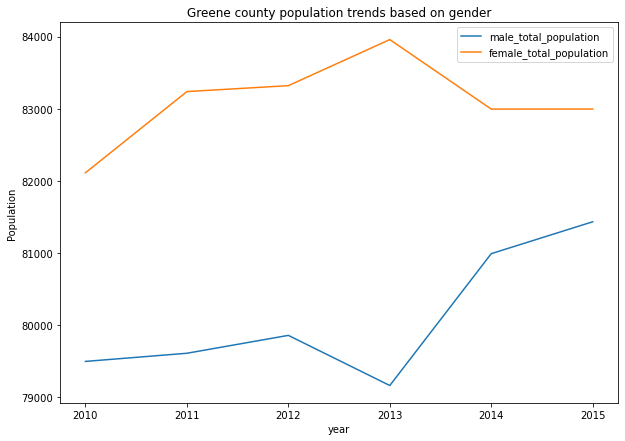

In [65]:
greene_county.plot.line('year',['male_total_population','female_total_population'], figsize = (10,7))
plt.title('Greene county population trends based on gender')
plt.ylabel('Population')
plt.show()

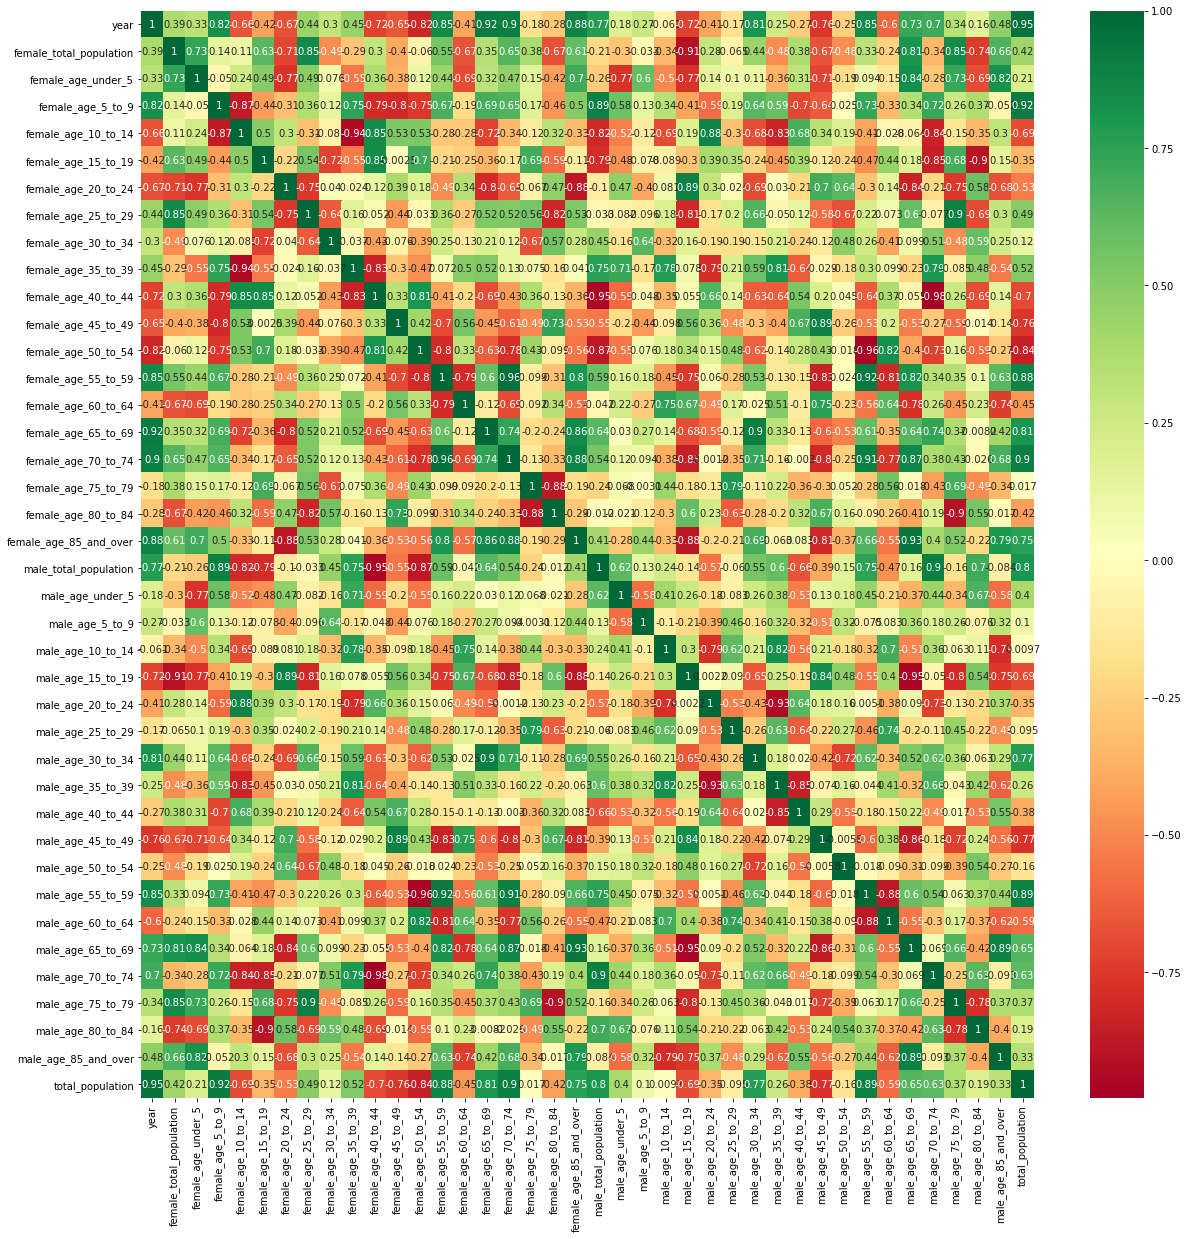

In [67]:
# CORRELATION MATRIX FOR GREENE COUNTY

plt.subplots(figsize=(20,20))
sns.heatmap(greene_county.corr(), annot=True, cmap='RdYlGn')
plt.show()
